# House Prices - Advanced Regression Techniques (Kaggle)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train=pd.read_csv('data/train.csv')
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: xlabel='SalePrice', ylabel='Count'>

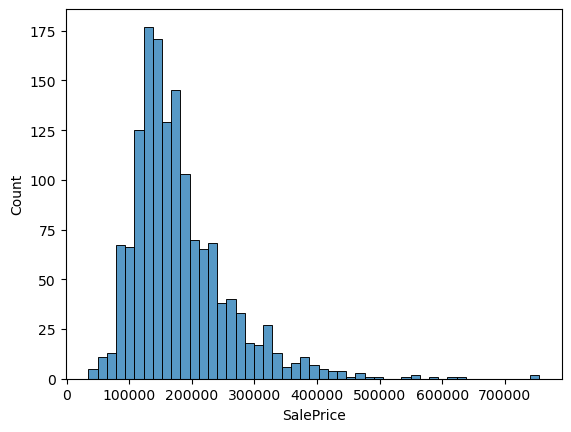

In [4]:
sns.histplot(data=df_train, x='SalePrice')

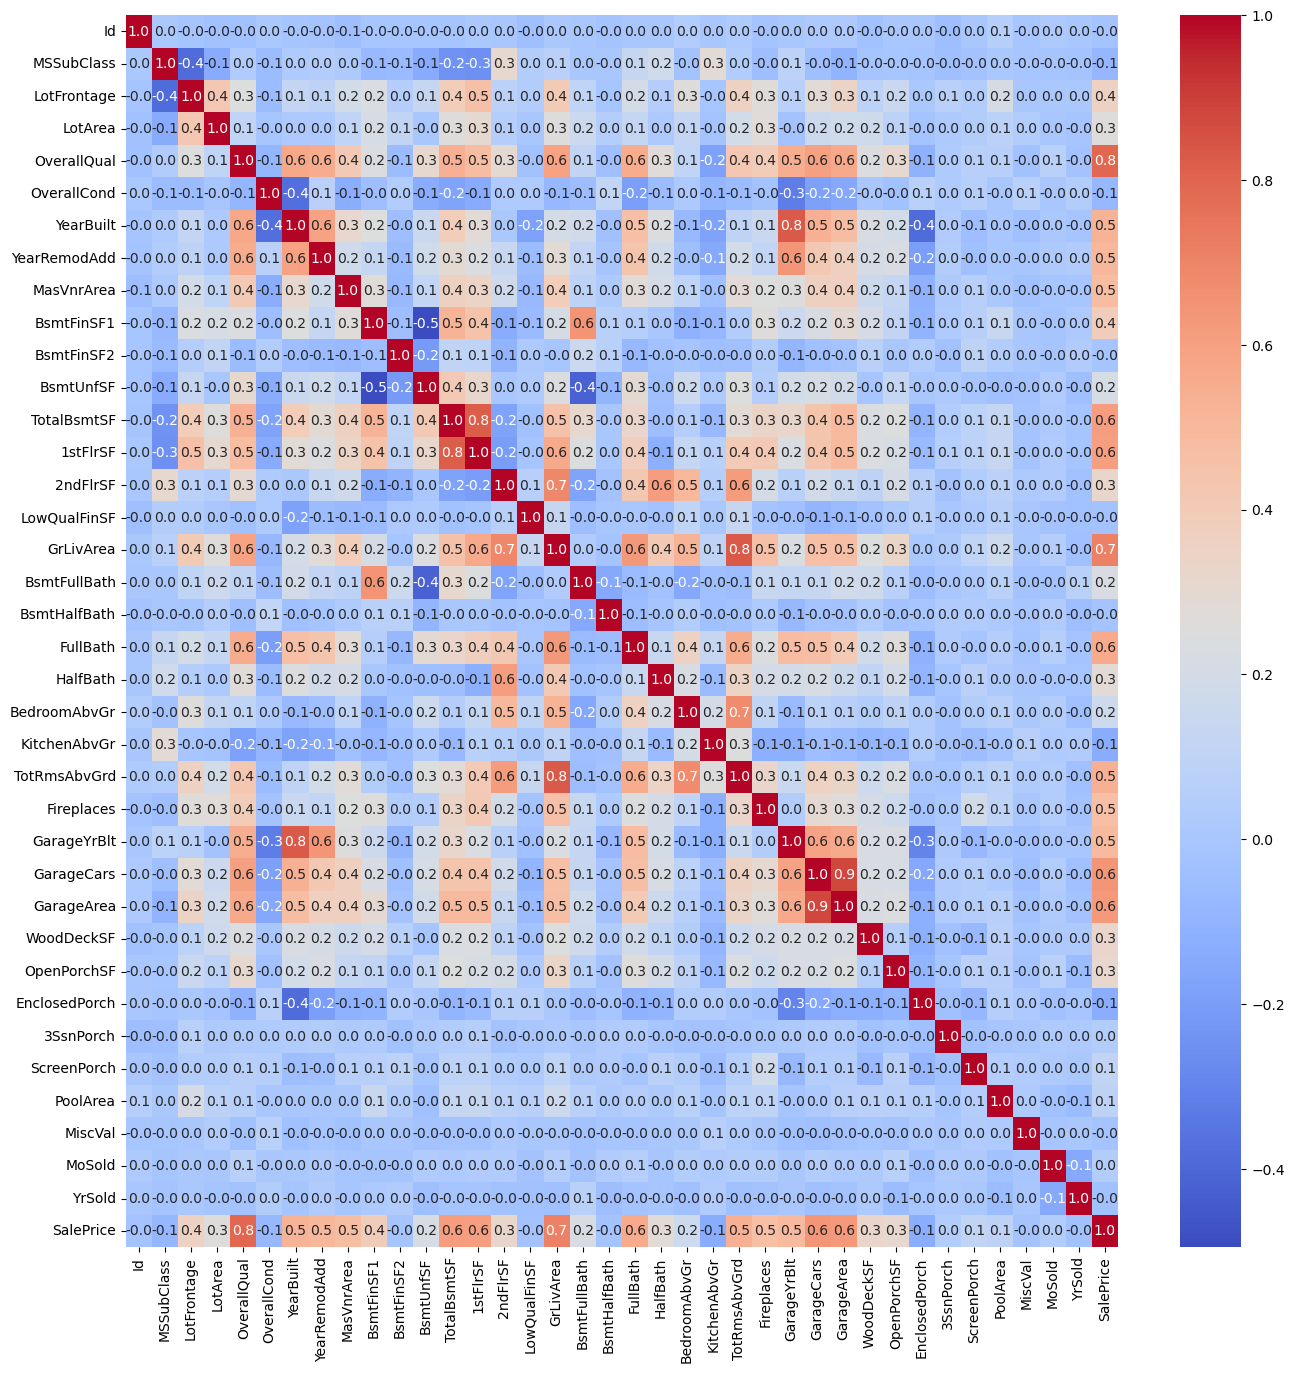

In [50]:
df_train_num=df_train.select_dtypes(include=np.number)

correlation_matrix=df_train_num.corr()
plt.figure(figsize=(16,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f');

<Figure size 640x480 with 0 Axes>

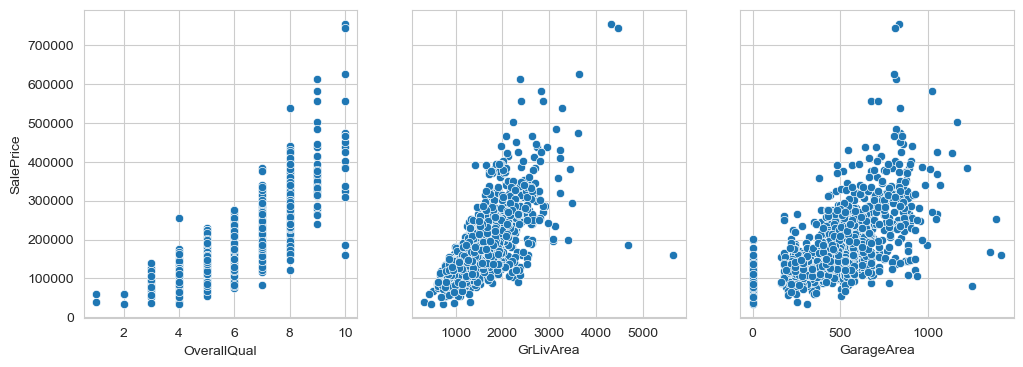

In [62]:
plt.tight_layout()

sns.set_style('whitegrid')

fig, axes = plt.subplots(1,3, figsize=(12,4), sharey=True);


sns.scatterplot(data=df_train, x='OverallQual', y='SalePrice', ax=axes[0]);

sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice', ax=axes[1]);

sns.scatterplot(data=df_train, x='GarageArea', y='SalePrice', ax=axes[2]);



In [64]:
NaN_values=pd.DataFrame()
NaN_values['Quantity']=df_train.isna().sum()
NaN_values['DataType']=df_train.dtypes
NaN_values['Rate %']=(NaN_values['Quantity']/len(df_train)*100).round(2)
NaN_values[NaN_values['Quantity']>0]#.sort_values(by='Rate %', ascending=False)

,Quantity,DataType,Rate %
LotFrontage,259,float64,17.74
Alley,1369,object,93.77
MasVnrType,872,object,59.73
MasVnrArea,8,float64,0.55
BsmtQual,37,object,2.53
BsmtCond,37,object,2.53
BsmtExposure,38,object,2.60
BsmtFinType1,37,object,2.53
BsmtFinType2,38,object,2.60
Electrical,1,object,0.07


We can't just drop the columns with a high rate (NaN instances/total instances) because in some of them these NaN-Values have information. They usually mean the absence of the characteristic associated with the feature.

In [75]:
none_cols=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC', 'Fence', 'MiscFeature']

median_cols=['LotFrontage','MasVnrArea']
mode_cols=['Electrical']

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

none_imputer= SimpleImputer(strategy='constant', fill_value='None')
median_imputer= SimpleImputer(strategy='median')
mode_imputer= SimpleImputer(strategy='most_frequent')

imputer_transformer=ColumnTransformer(
    transformers=[
        ('impute_as_none', none_imputer, none_cols),
        ('impute_with_median', median_imputer, median_cols),
        ('impute_with_mode', mode_imputer, mode_cols)
    ],
    remainder='passthrough' #This is very important!
)

In [77]:
df_train_imputed=imputer_transformer.fit_transform(df_train)